In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.special import logsumexp

In [2]:
with open("../microbio.p", "rb") as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['Ytrain', 'Ytest', 'Vtrain', 'Vtest'])


In [3]:
Ytrain = data['Ytrain']
Ytest = data['Ytest']
Vtrain = data['Vtrain']
Vtest = data['Vtest']

In [4]:
def draw_bar_plot(y):
    time = y[:, 0]
    y = y[:, 1:]
    plt.figure(figsize=(15,5))
    plt.xlabel("Time")
    bottom = np.zeros(y.shape[0])
    for j in range(y.shape[1]):
        plt.bar(time, y[:, j], bottom=bottom, edgecolor='white')
        bottom += y[:, j]
    plt.xticks(time)
    sns.despine()
    plt.show()

In [5]:
def add_noise(y, noise=1):
    days = y[:, 0][:, np.newaxis]
    p = y[:, 1:]
    p = p * (1 - 1e-6) + 1e-6 / p.shape[1]
    log_p = np.log(p) + np.random.normal(loc=0, scale=noise, size=p.shape)
    p_w_noise = np.exp(log_p - logsumexp(log_p, axis=-1, keepdims=True))
    y_w_noise = np.concatenate([days, p_w_noise], axis=-1)
    return y_w_noise

## Repeat Pink
### without noise

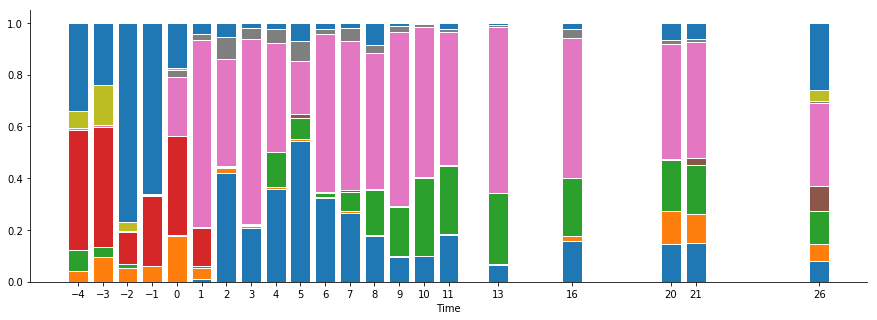

In [6]:
pink_y = Ytrain[8]
pink_v = Vtrain[8]
draw_bar_plot(pink_y)

In [7]:
new_data = {'Ytrain': [pink_y] * 600,
            'Ytest': [pink_y] * 40,
            'Vtrain': [pink_v] * 600,
            'Vtest': [pink_v] * 40}
with open("train_8_pink_repeat_600.p", "wb") as f:
    pickle.dump(new_data, f)

### with noise

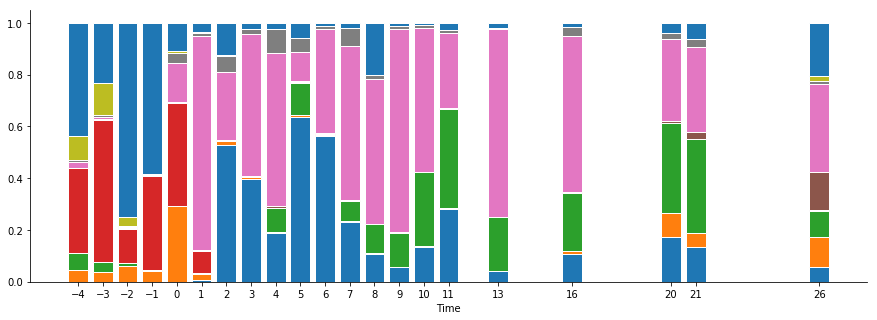

In [8]:
noise = 0.5
draw_bar_plot(add_noise(pink_y, noise))

In [9]:
new_data = {'Ytrain': [add_noise(pink_y, noise) for _ in range(600)],
            'Ytest': [add_noise(pink_y, noise) for _ in range(40)],
            'Vtrain': [pink_v] * 600,
            'Vtest': [pink_v] * 40}
with open("train_8_pink_repeat_600_w_noise.p", "wb") as f:
    pickle.dump(new_data, f)

## Repeat Purple
### without noise

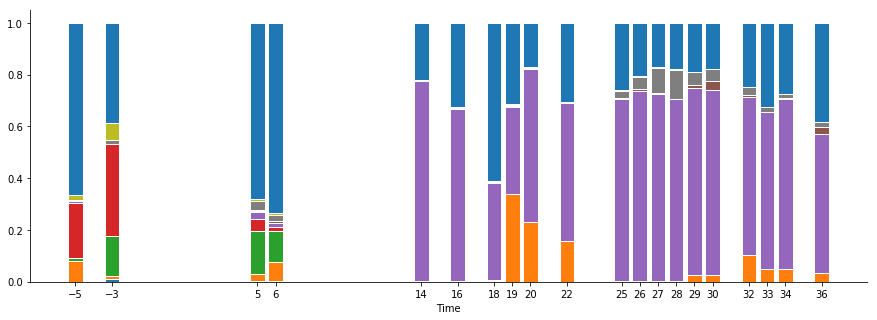

In [10]:
purple_y = Ytrain[0]
purple_v = Vtrain[0]
draw_bar_plot(purple_y)

In [11]:
new_data = {'Ytrain': [purple_y] * 600,
            'Ytest': [purple_y] * 40,
            'Vtrain': [purple_v] * 600,
            'Vtest': [purple_v] * 40}
with open("train_0_purple_repeat_600.p", "wb") as f:
    pickle.dump(new_data, f)

### with noise

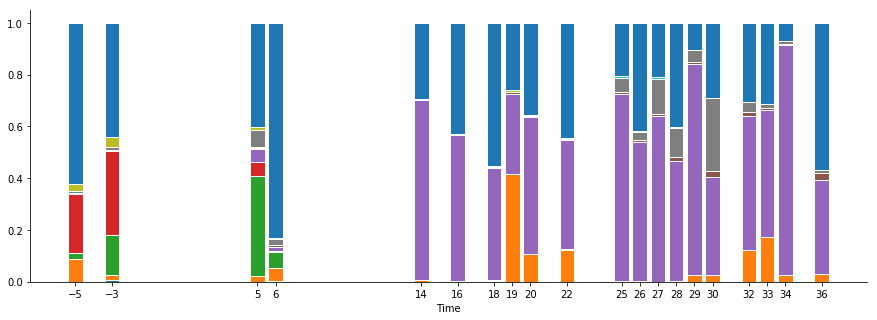

In [12]:
noise = 0.5
draw_bar_plot(add_noise(purple_y, noise))

In [13]:
new_data = {'Ytrain': [add_noise(purple_y, noise) for _ in range(600)],
            'Ytest': [add_noise(purple_y, noise) for _ in range(40)],
            'Vtrain': [purple_v] * 600,
            'Vtest': [purple_v] * 40}
with open("train_0_purple_repeat_600_w_noise.p", "wb") as f:
    pickle.dump(new_data, f)

## Bootstrap
### without noise

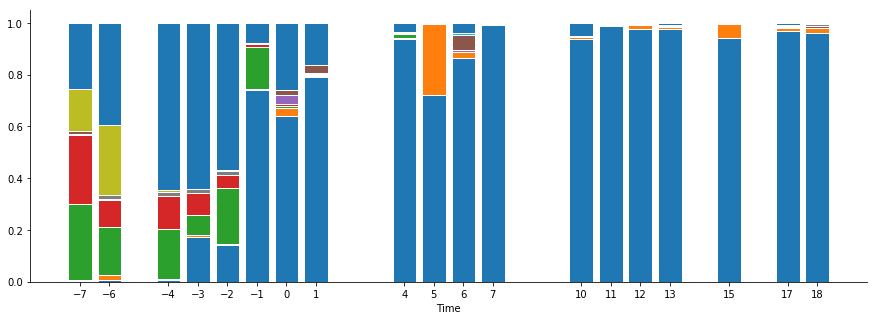

In [14]:
draw_idx = np.random.choice(len(Ytrain))
y = Ytrain[draw_idx]
draw_bar_plot(y)

In [15]:
new_Ytrain = []
new_Vtrain = []
for _ in range(600):
    idx = np.random.choice(len(Ytrain))
    new_Ytrain.append(Ytrain[idx])
    new_Vtrain.append(Vtrain[idx])
    
new_data = {'Ytrain': new_Ytrain,
            'Ytest': Ytest,
            'Vtrain': new_Vtrain,
            'Vtest': Vtest}
with open("bootstrap_600.p", "wb") as f:
    pickle.dump(new_data, f)

### with noise

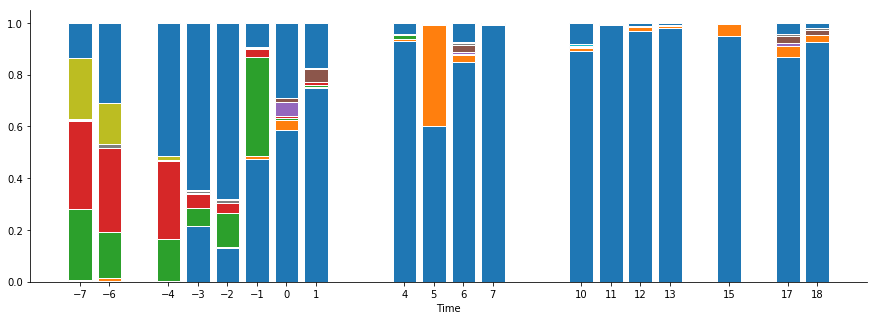

In [16]:
noise = 0.5
y = Ytrain[draw_idx]
draw_bar_plot(add_noise(y, noise))

In [17]:
new_Ytrain = []
new_Vtrain = []
for _ in range(600):
    idx = np.random.choice(len(Ytrain))
    new_Ytrain.append(add_noise(Ytrain[idx], noise))
    new_Vtrain.append(Vtrain[idx])
    
new_data = {'Ytrain': new_Ytrain,
            'Ytest': Ytest,
            'Vtrain': new_Vtrain,
            'Vtest': Vtest}
with open("bootstrap_600_w_noise.p", "wb") as f:
    pickle.dump(new_data, f)